In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Morphological Transformation
    이미지 프로세싱에서 Morphology(형태학)는 이미지를 Segmentation 하여 단순화, 제거, 보정을 통해 형태를 파악하는 목적으로 사용된다. 기본적으로 바이너리 이미지 상에서 이루어지며 원본 이미지와 이미지에 가해지는 변형을 결정하는 구조화된 요소(커널과 같은 역할), 2개의 입력값을 가진다. 그래서 Morphological Transformation(형태학적 변환)역시 이미지 필터링을 사용하여 영역을 변화시키는 방법중 하나라고 인식할 수 있다.
    
    일반적으로 Binary나 Grayscale 이미지에 사용되며, Dilation(팽창), Erosion(침식) 그리고 이 두개를 조합한 Opening과 Closing이 있다.

## cv2.getStructuringElement(shape, ksize [, anchor]) → retval
    구조화 요소(Structuring Element) 커널을 구하기 위한 방법은 cv2.getStructuringElement 함수를 사용하면 된다.
    
    1. shape : 구조화 요소 커널의 모양
    - cv2.MORPH_CROSS : 십자가형
    - cv2.MORPH_ELLIPSE : 타원형
    - cv2.MORPH_RECT : 직사각형
    cv::MorphShapes 참고
    
    2, ksize : 구조화 요소 커널의 크기
    3. anchor : 구조화 요소 커널의 기준점. default 값 (-1, -1)은 기준점을 중심으로 잡는다. 해당 값은 오직 cv2.MORPH_CROSS 모양을 사용할 때만 영향을 준다. cv2.MORPH_CROSS의 경우에는 해당 기준점이 있는 열과 행의 값만 1로 채워진다.

In [2]:
cv2.getStructuringElement(cv2.MORPH_CROSS, (5, 5), anchor = (1, 1))

array([[0, 1, 0, 0, 0],
       [1, 1, 1, 1, 1],
       [0, 1, 0, 0, 0],
       [0, 1, 0, 0, 0],
       [0, 1, 0, 0, 0]], dtype=uint8)

In [3]:
cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (7, 7))

array([[0, 0, 0, 1, 0, 0, 0],
       [0, 1, 1, 1, 1, 1, 0],
       [1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1],
       [0, 1, 1, 1, 1, 1, 0],
       [0, 0, 0, 1, 0, 0, 0]], dtype=uint8)

In [4]:
cv2.getStructuringElement(cv2.MORPH_RECT, (5, 5))

array([[1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1]], dtype=uint8)

# 1. Erosion (침식)
    원본 이미지의 각 픽셀에 structuring element(구조화 요소)를 적용해 하나라도 0이 있으면 대상 픽셀을 제거하는 방법이다. 아래 예제는 원본 이미지에 사각형 모양의 구조화 요소 커널을 적용시킨 모습이다. 원본 이미지와 결과 이미지를 보면 ★★ 검은색의 영역이 흰색을 침식해 들어가는 것을 확인할 수 있다. 결과적으로 이 방법은 작은 Object를 제거하는데 효과가 있다.
         
    [ 1, 1, 0, 0, 1, 1 ] * [ 1, 1, 1 ] = [ 0, 0, 0, 0, 0, 0 ]
    [ 1, 1, 0, 0, 1, 1 ]   [ 1, 1, 1 ]   [ 0, 0, 0, 0, 0, 0 ]
    [ 1, 1, 1, 1, 1, 1 ]   [ 1, 1, 1 ]   [ 0, 0, 0, 0, 0, 0 ]
    [ 1, 1, 1, 1, 1, 1 ]                 [ 0, 1, 1, 1, 1, 0 ]
    [ 1, 1, 1, 1, 1, 1 ]                 [ 0, 1, 1, 1, 1, 0 ]
    [ 1, 1, 1, 1, 1, 1 ]                 [ 0, 0, 0, 0, 0, 0 ]
    
    구조화 요소 커널의 모양이 사각형이 아니라 cross 혹은 타원형인 경우에는 이미지에 커널을 올릴 때 커널 전체를 인식하는 것이 아니라 커널에서 1인 부분만 인식하게 된다. 따라서 이미지 위에서 커널이 움직일때 각각 cross 형태로, 타원형태로 움직이게 된다.
    
## cv2.erode(src, kernel [, dst [, anchor [, iterations [, borderType [, borderValue]]]]]) → dst
    특정 구조화 요소를 사용하여 이미지를 침식시키는 함수
    1. src : 입력이미지. 채널 수는 상관 없으나 다음과 같은 이미지 데이터만 사용할 수 있다. (CV_8U, CV_16U, CV_16S, CV_32F, CV_64F)
    2. kernel : 침식에 사용할 구조화 요소 커널. 앞서 cv2.getStructuringElement로 생성할 수 있다.
    3. anchor : 구조화 요소 안에서 사용할 기준점. default로 (-1, -1)이 지정되어 있어 구조화 요소 중심을 기준으로 잡는다. 앞서 filter2D에서의 anchor 처럼 침식할 픽셀의 위치가 구조화 요소 안에서 어디에 위치해야 하는지 지정해준다.
    4. iterations : 침식을 반복할 횟수를 지정한다.

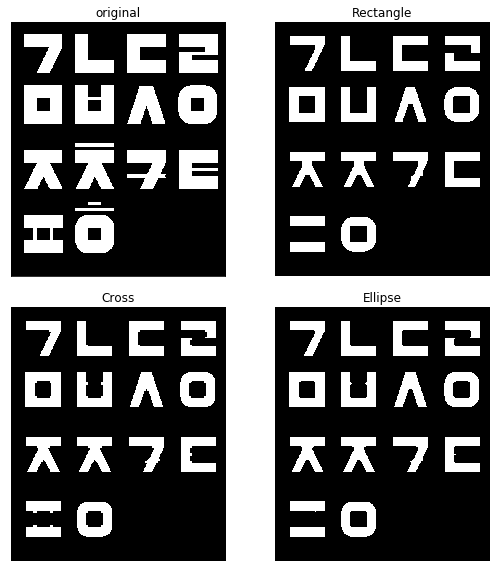

In [5]:
img = cv2.imread('hangul.jpg')
res, img = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY_INV)

kernel = {}
kernel[0] = cv2.getStructuringElement(cv2.MORPH_RECT, (11, 11))
kernel[1] = cv2.getStructuringElement(cv2.MORPH_CROSS, (11, 11))
kernel[2] = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (11, 11))
titles = ["Rectangle", "Cross", "Ellipse"]

plt.figure(figsize=(8, 8))
plt.subplot(2, 2, 1)
plt.title('original')
plt.imshow(img)
plt.xticks([])
plt.yticks([])

for i in range(3):
    erosion = cv2.erode(img, kernel[i])
    plt.subplot(2, 2, i+2)
    plt.title(titles[i])
    plt.imshow(erosion)
    plt.axis("off")
    
plt.tight_layout()
plt.show()

# 2. Dilation (팽창)
    팽창은 원본 이미지의 각 픽셀에 structuring element(구조화 요소)를 적용해 하나라도 1이 있으면 대상 픽셀을 1로 만드는 방법이다. 아래 예제는 원본 이미지에 사각형 모양의 구조화 요소 커널을 적용시킨 모습이다. 원본 이미지와 결과 이미지를 보면 아까와는 반대로 ★★ 흰색의 영역이 더 넓어지는 것을 확인할 수 있다. 결과적으로 경계가 조금 부드러워지고 구멍이 메꾸어지는 효과가 있다.
         
    [ 0, 0, 0, 0, 0, 0 ] * [ 1, 1, 1 ] = [ 0, 0, 0, 0, 0, 0 ]
    [ 0, 0, 0, 0, 0, 0 ]   [ 1, 1, 1 ]   [ 0, 0, 0, 0, 0, 0 ]
    [ 0, 0, 0, 0, 0, 0 ]   [ 1, 1, 1 ]   [ 1, 1, 1, 1, 1, 1 ]
    [ 0, 1, 1, 1, 1, 0 ]                 [ 1, 1, 1, 1, 1, 1 ]
    [ 0, 1, 1, 1, 1, 0 ]                 [ 1, 1, 1, 1, 1, 1 ]
    [ 0, 0, 0, 0, 0, 0 ]                 [ 1, 1, 1, 1, 1, 1 ]
    
## cv2.dilate(src, kernel [, dst [, anchor [, iterations [, borderType [, borderValue]]]]]) -> dst
    특정 구조화 요소를 사용하여 이미지를 팽창시키는 함수
    1. src : 입력이미지. 채널 수는 상관 없으나 다음과 같은 이미지 데이터만 사용할 수 있다. (CV_8U, CV_16U, CV_16S, CV_32F, CV_64F)
    2. kernel : 팽창에 사용할 구조화 요소 커널. 앞서 cv2.getStructuringElement로 생성할 수 있다.
    3. anchor : 구조화 요소 안에서 사용할 기준점. default로 (-1, -1)이 지정되어 있어 구조화 요소 중심을 기준으로 잡는다. 앞서 filter2D에서의 anchor 처럼 팽창할 픽셀의 위치가 구조화 요소 안에서 어디에 위치해야 하는지 지정해준다.
    4. iterations : 팽창을 반복할 횟수를 지정한다.

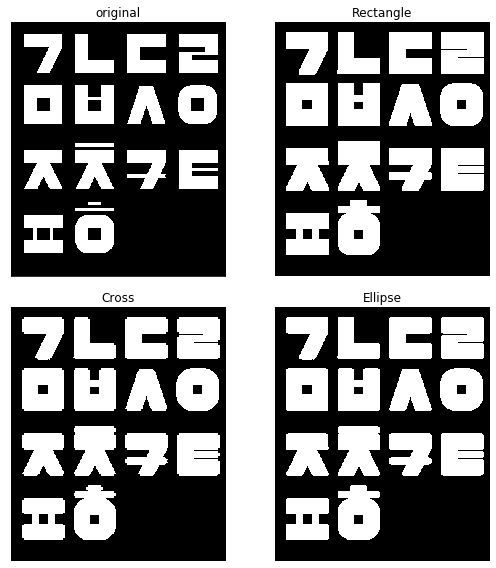

In [6]:
img2 = cv2.imread('hangul.jpg')
res, img2 = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY_INV)

kernel = {}
kernel[0] = cv2.getStructuringElement(cv2.MORPH_RECT, (11, 11))
kernel[1] = cv2.getStructuringElement(cv2.MORPH_CROSS, (11, 11))
kernel[2] = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (11, 11))
titles = ["Rectangle", "Cross", "Ellipse"]

plt.figure(figsize=(8, 8))
plt.subplot(2, 2, 1)
plt.title('original')
plt.imshow(img)
plt.xticks([])
plt.yticks([])

for i in range(3):
    dilation = cv2.dilate(img, kernel[i])
    plt.subplot(2, 2, i+2)
    plt.title(titles[i])
    plt.imshow(dilation)
    plt.axis("off")
    
plt.tight_layout()
plt.show()

# 3. Opening & Closing
    Opening : 이미지에 Erosion(침식) 적용 후 Dilation(팽창) 적용하는 것으로 영역이 점점 둥글게 된다. 따라서 점 잡음 이나 작은 물체, 돌기 등을 제거하는데 적합하다.
    Closing : 이미지에 Dilation(팽창) 적용 후 Erosion(침식) 적용하는 것으로 영역과 영역이 서로 붙기 때문에 이미지의 전체적인 윤곽을 파악하기에 적합하다.
    
    (Opening)
    [ 1, 1, 0, 0, 1, 1 ] * [ 1, 1, 1 ] = [ 0, 0, 0, 0, 0, 0 ] * [ 1, 1, 1 ] = [ 0, 0, 0, 0, 0, 0 ]
    [ 1, 1, 0, 0, 1, 1 ]   [ 1, 1, 1 ]   [ 0, 0, 0, 0, 0, 0 ]   [ 1, 1, 1 ]   [ 0, 0, 0, 0, 0, 0 ]
    [ 1, 1, 1, 1, 1, 1 ]   [ 1, 1, 1 ]   [ 0, 0, 0, 0, 0, 0 ]   [ 1, 1, 1 ]   [ 1, 1, 1, 1, 1, 1 ]
    [ 1, 1, 1, 1, 1, 1 ]                 [ 0, 1, 1, 1, 1, 0 ]                 [ 1, 1, 1, 1, 1, 1 ]
    [ 1, 1, 1, 1, 1, 1 ]                 [ 0, 1, 1, 1, 1, 0 ]                 [ 1, 1, 1, 1, 1, 1 ]
    [ 1, 1, 1, 1, 1, 1 ]                 [ 0, 0, 0, 0, 0, 0 ]                 [ 1, 1, 1, 1, 1, 1 ]
    
    (Closing)
    [ 1, 1, 0, 0, 0, 0 ] * [ 1, 1, 1 ] = [ 1, 1, 1, 0, 0, 0 ] * [ 1, 1, 1 ] = [ 0, 0, 0, 0, 0, 0 ]
    [ 1, 1, 0, 0, 0, 0 ]   [ 1, 1, 1 ]   [ 1, 1, 1, 0, 0, 0 ]   [ 1, 1, 1 ]   [ 0, 1, 0, 0, 0, 0 ]
    [ 1, 1, 0, 0, 0, 0 ]   [ 1, 1, 1 ]   [ 1, 1, 1, 1, 1, 1 ]   [ 1, 1, 1 ]   [ 0, 1, 0, 0, 0, 0 ]
    [ 1, 1, 1, 1, 1, 1 ]                 [ 1, 1, 1, 1, 1, 1 ]                 [ 0, 1, 1, 1, 1, 0 ]
    [ 0, 0, 0, 0, 0, 0 ]                 [ 1, 1, 1, 1, 1, 1 ]                 [ 0, 1, 1, 1, 1, 0 ]
    [ 1, 1, 1, 1, 1, 1 ]                 [ 1, 1, 1, 1, 1, 1 ]                 [ 0, 0, 0, 0, 0, 0 ]

## cv2.morphologyEx(src, op, kernel [, dst [, anchor [, iterations [, borderType [, borderValue]]]]]) → dst
    해당 함수는 앞서 Dilation(팽창)과 Erosion(수축)의 형태학적 변환을 결합하여 연산하는데 도움을 주는 함수이다.
    1. src : 입력이미지. 채널 수는 상관 없으나 다음과 같은 이미지 데이터만 사용할 수 있다. (CV_8U, CV_16U, CV_16S, CV_32F, CV_64F)
    
    ★ op : 형태학적 연산의 종류
    cv2.MORPH_OPEN : cv2.dilate(cv2.erode(src))
    cv2.MORPH_CLOSE : cv2.erode(cv2.dilate(src))
    cv2.MORPH_GRADIENT : cv2.dilate(src) - cv2.erode(cv2)
    cv2.MORPH_TOPHAT : src - opening
    cv2.MORPH_BLACKHAT : closing - src
    cv::MorphTypes 참고
    
    3. kernel : 구조화 요소 커널. 앞서 cv2.getStructuringElement로 생성할 수 있다.
    4. anchor : 구조화 요소 커널에서의 기준점. default로 (-1, -1)이 설정되어 있으며 이는 커널의 중앙을 뜻한다.
    5. iterations : 형태학적 변환 반복 횟수

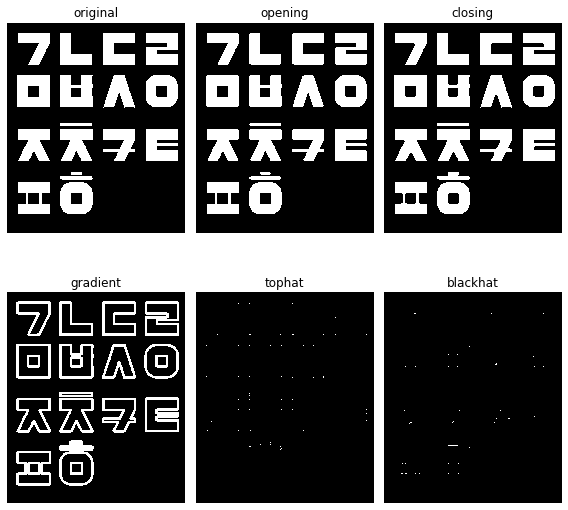

In [9]:
img3 = cv2.imread('hangul.jpg')
res, img3 = cv2.threshold(img3, 127, 255, cv2.THRESH_BINARY_INV)

kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (9, 9))
opening = cv2.morphologyEx(img3, cv2.MORPH_OPEN, kernel)
closing = cv2.morphologyEx(img3, cv2.MORPH_CLOSE, kernel)
gradient = cv2.morphologyEx(img3, cv2.MORPH_GRADIENT, kernel)
tophat = cv2.morphologyEx(img3, cv2.MORPH_TOPHAT, kernel)
blackhat = cv2.morphologyEx(img3, cv2.MORPH_BLACKHAT, kernel)

titles = ['original', 'opening', 'closing', 'gradient', 'tophat', 'blackhat']
images = [img3, opening, closing, gradient, tophat, blackhat]

plt.figure(figsize=(8, 8))
for i in range(6):
    plt.subplot(2, 3, i+1)
    plt.imshow(images[i])
    plt.title(titles[i])
    plt.axis('off')
    
plt.tight_layout()
plt.show()